# Phys 41 Homework 6 Jake Anderson 3/6/2024

## Problem 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [2]:
points = []
with open("hw6_data.txt", "r") as f:
    lines = f.readlines()

for line in lines:
    # Check if the line is a comment; if so, skip
    if line.lstrip()[0] == "*":
        continue

    # Append the floats to our list of points
    point = line.split(",")
    point = [float(v) for v in point]
    points.append(point)

# Create numpy arrays from our list of points
data1 = np.array([point[0] for point in points])
data2 = np.array([point[1] for point in points])
times = np.array([point[2] for point in points])

In [12]:
def line(params, x):
    m, b = params
    return m * x + b


def error1(params, x, data):
    y_true = data
    y_pred = line(params, x)
    return np.sum((y_true - y_pred) ** 2)

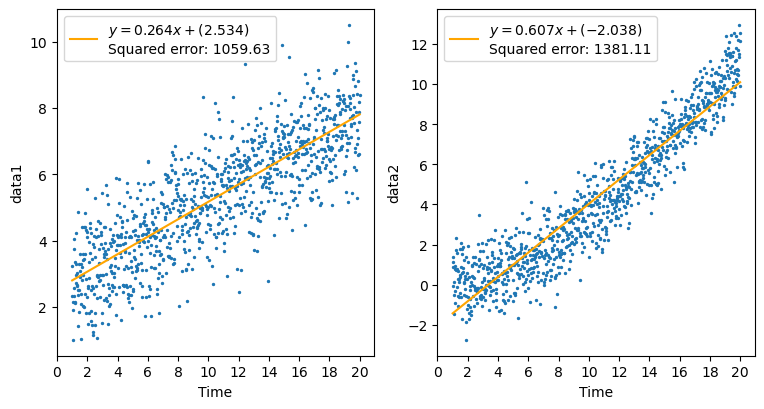

In [51]:
result1 = minimize(error1, [1, 1], args=(times, data1))
result2 = minimize(error1, [1, 1], args=(times, data2))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.5))

ax1.scatter(times, data1, s=2)
ax1.plot(
    times,
    line(result1.x, times),
    color="orange",
    zorder=10,
    label=f"$y={result1.x[0]:0.3f}x+({result1.x[1]:0.3f})$\nSquared error: {result1.fun:0.2f}",
)
ax1.set_xticks(np.arange(min(times) - 1, max(times) + 1, 2))
ax1.set_xlabel("Time")
ax1.set_ylabel("data1")
ax1.legend()

ax2.scatter(times, data2, s=2)
ax2.plot(
    times,
    line(result2.x, times),
    color="orange",
    zorder=10,
    label=f"$y={result2.x[0]:0.3f}x+({result2.x[1]:0.3f})$\nSquared error: {result2.fun:0.2f}",
)
ax2.set_xticks(np.arange(min(times) - 1, max(times) + 1, 2))
ax2.set_xlabel("Time")
ax2.set_ylabel("data2")
ax2.legend()

fig.show()

The squared error of data2's line of best fit is higher than the squared error of data1's line of best fit. The points of data2 seem to have slightly less spread than data1, which would normally reduce squared error, but data2 also seems to be nonlinear, which significantly increases squared error.

In [52]:
def power(params, x):
    a, gamma = params
    return a * x**gamma


def error2(params, x, data):
    y_true = data
    y_pred = power(params, x)
    return np.sum((y_true - y_pred) ** 2)

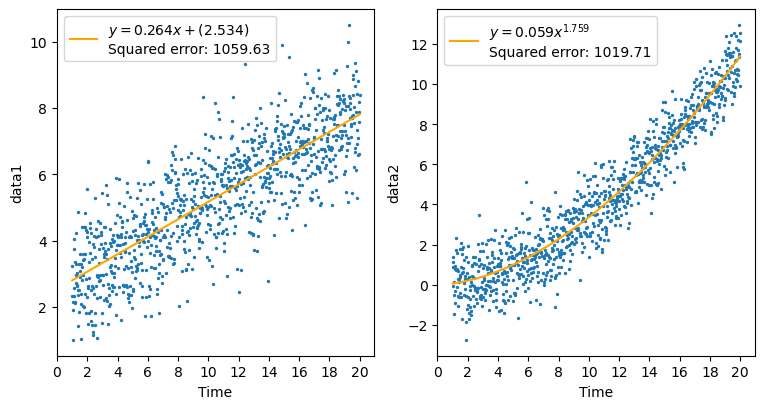

In [50]:
result1 = minimize(error1, [1, 1], args=(times, data1))
result2 = minimize(error2, [1, 1], args=(times, data2))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.5))

ax1.scatter(times, data1, s=2)
ax1.plot(
    times,
    line(result1.x, times),
    color="orange",
    zorder=10,
    label=f"$y={result1.x[0]:0.3f}x+({result1.x[1]:0.3f})$\nSquared error: {result1.fun:0.2f}",
)
ax1.set_xticks(np.arange(min(times) - 1, max(times) + 1, 2))
ax1.set_xlabel("Time")
ax1.set_ylabel("data1")
ax1.legend()

ax2.scatter(times, data2, s=2)
ax2.plot(
    times,
    power(result2.x, times),
    color="orange",
    zorder=10,
    label=f"$y={result2.x[0]:0.3f}x^{{{result2.x[1]:0.3f}}}$\nSquared error: {result2.fun:0.2f}",
)
ax2.set_xticks(np.arange(min(times) - 1, max(times) + 1, 2))
ax2.set_xlabel("Time")
ax2.set_ylabel("data2")
ax2.legend()

fig.show()

Using $S(t)=at^\gamma$ gives a much better squared error when fitted. The squared error is comparable to the squared error of the linear fit performed on data1.